# Reinforcement Learning - Bellman Equation Problem

**Problem Statement:** Suppose there is a driver who wants to transport some purchased item to a customer from source location A (shop) to destination location B (customer house). There are a number of routes available for transporting an item from location A to location B. While delivering the item, there are certain challenges the driver has to look after such as transportation time, cost and traffic. The objective of the problem is to find the optimal route for the driver by overcoming all the three parameters mentioned above. 
### Markov Decision Process (MDP) in route planning application 

Markov Decision Processes (MDPs) are a mathematical tool for modeling complex decision-making problems under uncertainty. They are especially useful for route planning applications, where multiple factors such as time, cost, and traffic affect the optimal choice of states. By using MDPs, we can systematically evaluate the expected outcomes of different decisions and choose the best one according to our preferences and objectives.

**Environment:**
The environment in this problem consists of various routes connecting different points. Each point represents a state, and the routes represent possible actions that can be taken from each state. The environment is stochastic, meaning the outcome of an action (taking a route) is uncertain due to traffic conditions and other factors.

**State Space:**
The state space comprises the points (or locations) in the network. The states are represented as letters ('A', 'B', 'C', etc.), and each state corresponds to a particular location in the network.

**Action Space:**
The action space consists of the available routes from each state. For instance, from point 'A', there might be several routes (actions) available to reach other points. Actions are the decisions made by the agent (in this case, the route planner) to transition between states.

**Transition Probabilities:**
Transition probabilities represent the likelihood of moving from one state to another after taking a particular action. The transition probabilities are calculated based on historical data, indicating the likelihood of successfully traversing from one point to another via a specific route, considering factors like traffic and other constraints.

**Reward Function:**
The reward function defines the immediate benefit (or cost) associated with taking an action in a particular state. In the context of route planning, the reward function could include factors such as travel time, cost, and traffic intensity. The agent aims to maximize cumulative rewards over time.

**Value Iteration:**
The value iteration algorithm is employed to find the optimal policy (route) by iteratively updating the value function associated with each state. The value function represents the expected cumulative reward starting from a particular state and following the optimal policy thereafter.

**Equation for Value Iteration:** 

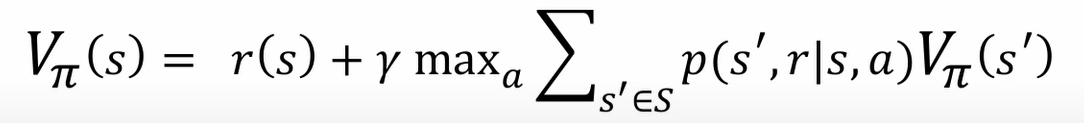

**Equation for Optimal Policy:**

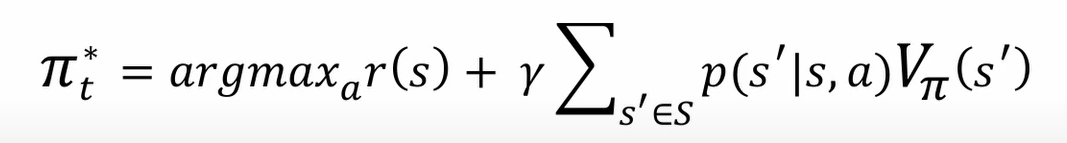

2. Calculate the transition probability for each route selection based on the values given in the below table.

In [1]:
import pandas as pd
import numpy as np

# Define the data dictionary
data = {
    "Route": [ 'Route 1', 'Route 2', 'Route 3', 'Route 6', 'Route 4', 'Route 1', 'Route 5', 'Route 7', 'Route 8',\
               'Route 2', 'Route 3', 'Route 8', 'Route 5', 'Route 4', 'Route 3', 'Route 7', 'Route 6', 'Route 1'],
    "Time": ["Best", "Average", "Best", "Worst", "Average", "Average", "Average", "Worst", "Best", "Best", "Worst", "Best", "Worst", "Worst", "Best", "Average", "Average", "Average"],
    "Cost": ["Minimum", "Minimum", "Maximum", "Maximum", "Minimum", "Minimum", "Maximum", "Minimum", "Minimum", "Maximum", "Maximum", "Minimum", "Maximum", "Minimum", "Maximum", "Minimum", "Minimum", "Maximum"],
    "Traffic Intensity": ["Medium", "Medium", "Low", "High", "High", "Low", "High", "High", "Medium", "Medium", "Medium", "Low", "High", "Medium", "Low", "Low", "Low", "Low"],
    "Selection": ["Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No"]
}

# Create a pandas DataFrame from the data dictionary
df = pd.DataFrame(data)

def calculate_probabilities(df, x, value, c, alpha=1):
    """
    Calculate the transition probability for a given value of a predictor variable in a specific class.

    Parameters:
    - df: pandas DataFrame - The input DataFrame containing the data
    - x: str - The name of the predictor variable
    - value: object - The value of the predictor variable
    - c: object - The value of the class variable
    - alpha: int, optional - The smoothing parameter for Laplace smoothing (default: 1)

    Returns:
    - float - The calculated transition probability
    """

    # Calculate the total number of instances
    total_instances = df.shape[0]

    # Calculate the number of instances in the class
    class_instances = df[df[x] == value].shape[0]

    # Calculate the number of instances where the predictor has the given value
    predictor_instances = df[df['Selection'] == c].shape[0] 

    # Calculate the number of instances in the class where the predictor has the given value
    class_predictor_instances = df[(df['Selection'] == c) & (df[x] == value)].shape[0]

    # Apply Laplace smoothing
    likelihood = (class_predictor_instances + alpha) / (class_instances + alpha * len(df[x].unique()))

    # Calculate the class prior probability
    class_prior = class_instances / total_instances

    # Calculate the predictor prior probability
    predictor_prior = predictor_instances / total_instances

    # Calculate the posterior probability (transition probability)
    posterior_probability = likelihood * class_prior / predictor_prior

    return posterior_probability

# Calculate probabilities 
for route in df['Route'].unique():
    posterior_probability = calculate_probabilities(df, 'Route', route, 'Yes')
    print(f'{route}, transition_probability: {posterior_probability}')

Route 1, transition_probability: 0.0909090909090909
Route 2, transition_probability: 0.06666666666666667
Route 3, transition_probability: 0.030303030303030304
Route 6, transition_probability: 0.06666666666666667
Route 4, transition_probability: 0.022222222222222223
Route 5, transition_probability: 0.044444444444444446
Route 7, transition_probability: 0.06666666666666667
Route 8, transition_probability: 0.022222222222222223


Diagram after calculating the probability for each route selection

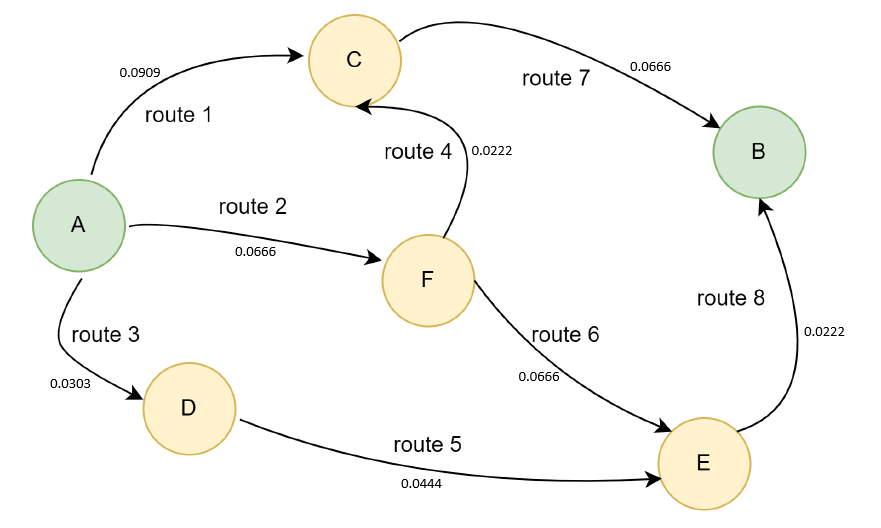

3. Find the best optimal route for the driver for the above mentioned all the scenarios using Bellman
equation and value iteration only.

In [2]:
import pandas as pd
import numpy as np

# Define actions for each state
actions = {
    'A': {'Route 1': 'C', 'Route 2': 'F', 'Route 3': 'D'},
    'E': {'Route 8': 'B'},
    'F': {'Route 4': 'C', 'Route 6': 'E'},
    'D': {'Route 5': 'E'},
    'C': {'Route 7': 'B'},
    'B': {}
}

# Define reward values based on the type (Time, Cost, Traffic Intensity)
reward_values = {
    'Time': {
        'Best': 5,
        'Average': 1,
        'Worst': -5
    },
    'Cost': {
        'Minimum': 5,
        'Maximum': -5
    },
    'Traffic Intensity': {
        'High': -5,
        'Medium': 1,
        'Low': 5
    }
}

In [3]:
# Define state indices for reference
states = list(actions.keys())
state_indices = {state: i for i, state in enumerate(states)}

# Create an empty transition probability matrix
num_states = len(states)
transition_prob_matrix = np.zeros((num_states, num_states))

# Iterate through actions and calculate transition probabilities
for from_state, action_dict in actions.items():
    from_index = state_indices[from_state]
    for route, to_state in action_dict.items():
        to_index = state_indices[to_state]
        transition_prob_matrix[from_index, to_index] = calculate_probabilities(df, 'Route', route, 'Yes')

# Sort the states alphabetically and get their indices
sorted_states_indices = np.argsort(states)

# Sort the transition probability matrix in-place
transition_prob_matrix = transition_prob_matrix[sorted_states_indices][:, sorted_states_indices]

# Create a dataframe with sorted state indices as states
df_sorted_transition_prob = pd.DataFrame(transition_prob_matrix, index=sorted(states), columns=sorted(states))

# Print sorted transition probability matrix in dataframe format
print("\nTransition Probability Matrix:")
print(df_sorted_transition_prob)


Transition Probability Matrix:
     A         B         C         D         E         F
A  0.0  0.000000  0.090909  0.030303  0.000000  0.066667
B  0.0  0.000000  0.000000  0.000000  0.000000  0.000000
C  0.0  0.066667  0.000000  0.000000  0.000000  0.000000
D  0.0  0.000000  0.000000  0.000000  0.044444  0.000000
E  0.0  0.022222  0.000000  0.000000  0.000000  0.000000
F  0.0  0.000000  0.022222  0.000000  0.066667  0.000000


In [5]:
# Define the reward function based on the scenario
def calculate_reward(df, route, scenario, reward_values):
    """
    Calculate the reward for a given route and scenario based on the provided reward values.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the data.
    - route (str): The route for which the reward is calculated.
    - scenario (str): The scenario for which the reward is calculated. Can be 'Time', 'Cost', 'Traffic Intensity', or 'all'.
    - reward_values (dict): A dictionary containing the reward values for each scenario.

    Returns:
    - reward (float): The calculated reward.
    """
    # If the scenario is not 'all', i.e., it is either 'Time', 'Cost', or 'Traffic Intensity'
    if scenario != 'all':
        # Get the values for the given scenario for the specified route
        values = df[df['Route'] == route][scenario]
        
        # Get the reward dictionary for the given scenario
        reward_dict = reward_values[scenario]
        
        # Calculate the reward as the average of the rewards for the values
        reward = sum([reward_dict[value] for value in values]) / len(values)

    # If the scenario is 'all'
    elif scenario == 'all':
        # Calculate the time reward as the average of the rewards for the time values for the specified route
        time_reward = sum([reward_values['Time'][value] for value in df[df['Route'] == route]['Time']]) / len(df[df['Route'] == route]['Time'])
        
        # Calculate the cost reward as the average of the rewards for the cost values for the specified route
        cost_reward = sum([reward_values['Cost'][value] for value in df[df['Route'] == route]['Cost']]) / len(df[df['Route'] == route]['Cost'])
        
        # Calculate the traffic intensity reward as the average of the rewards for the traffic intensity values for the specified route
        traffic_reward = sum([reward_values['Traffic Intensity'][value] for value in df[df['Route'] == route]['Traffic Intensity']]) / len(df[df['Route'] == route]['Traffic Intensity'])
        
        # Calculate the total reward as the sum of the time reward, cost reward, and traffic intensity reward
        reward = time_reward + cost_reward + traffic_reward

    # If the scenario is neither 'all' nor one of 'Time', 'Cost', or 'Traffic Intensity'
    else:
        # Raise a ValueError
        raise ValueError("Invalid scenario. Please choose 'Time', 'Cost', 'Traffic Intensity', or 'all'.")

    # Return the calculated reward
    return reward


# Define the optimization function
def optimize_route(df, actions, reward_values, discount_factor, scenario, df_sorted_transition_prob, max_iterations, convergence_delta):
    """
    Optimize the route based on the value iteration algorithm.

    Args:
        df (DataFrame): The input data frame.
        actions (dict): A dictionary of possible actions for each state.
        reward_values (dict): A dictionary of reward values for each action.
        discount_factor (float): The discount factor for future rewards.
        scenario (str): The scenario for optimization.
        df_sorted_transition_prob (DataFrame): The sorted transition probabilities.
        max_iterations (int): The maximum number of iterations for value iteration.
        convergence_delta (float): The convergence threshold for value iteration.

    Returns:
        tuple: A tuple containing the optimal route and the value function.
    """
    # Initialize the value function for each state (point)
    states = list(actions.keys())
    value_function = {state: 0 for state in states}

    # Value iteration algorithm
    for iteration in range(max_iterations):
        delta = 0
        for state, state_actions in actions.items():
            for action, next_state in state_actions.items():
                # Calculate the transition probability
                transition_probability = df_sorted_transition_prob.loc[state, next_state]
                
                # Calculate the reward for the current action in the current scenario
                reward = calculate_reward(df, action, scenario, reward_values)
                
                # Calculate the new value for the current state
                new_value = max(value_function[state], reward + discount_factor * transition_probability * value_function[next_state])
                
                # Update the maximum change in the value function for the current iteration
                delta = max(delta, abs(new_value - value_function[state]))
                
                # Update the value function for the current state
                value_function[state] = new_value

                # Print the state, action, next state, transition probability, and new value
                print(f"\nState: {state}")
                print(f"Action: {action}")
                print(f"Next State: {next_state}")
                print(f"Transition Probability: {transition_probability}")
                print(f"New Value: {new_value}")

        # Print the iteration number and the value function for this iteration
        print(f"\nIteration {iteration + 1} Value Function: {value_function}")

        # If the maximum change in the value function is less than the convergence delta, stop the algorithm
        if delta < convergence_delta:
            print("Convergence achieved.")
            break


    # Initialize an empty list to store the optimal route
    optimal_route = []

    # Start from state 'A'
    current_state = 'A'

    # Continue until we reach state 'B'
    while current_state != 'B':
        # Initialize the maximum value to negative infinity
        max_value = float('-inf')

        # Initialize the next state to None
        next_state = None

        # Iterate over all possible actions from the current state
        for action, next_state_candidate in actions[current_state].items():
            # Calculate the value of taking the action and moving to the next state candidate
            value = calculate_reward(df, action, scenario, reward_values) + discount_factor * df_sorted_transition_prob.loc[current_state, next_state_candidate]*value_function[next_state_candidate]

            # If this value is greater than the current maximum value, update the maximum value and the next state
            if value > max_value:
                max_value = value
                next_state = next_state_candidate

        # Add the current state and the optimal next state to the optimal route
        optimal_route.append((current_state, next_state))

        # Move to the next state
        current_state = next_state

    # Print the optimal route
    print(f"\nOptimal Route for {scenario.capitalize()} Optimization:")
    for from_state, to_state in optimal_route:
        print(f"From {from_state} to {to_state}")

    return optimal_route, value_function

In [6]:
# Define the scenarios and parameters
max_iterations = 100
discount_factor = 0.9
convergence_delta= 0.1

# Scenario 1: Optimize the route with respect to time
scenario = 'Time'
optimal_route, value_function = optimize_route(df, actions, reward_values, discount_factor, scenario, df_sorted_transition_prob, max_iterations, convergence_delta)



State: A
Action: Route 1
Next State: C
Transition Probability: 0.0909090909090909
New Value: 2.3333333333333335

State: A
Action: Route 2
Next State: F
Transition Probability: 0.06666666666666667
New Value: 3.0

State: A
Action: Route 3
Next State: D
Transition Probability: 0.030303030303030304
New Value: 3.0

State: E
Action: Route 8
Next State: B
Transition Probability: 0.022222222222222223
New Value: 5.0

State: F
Action: Route 4
Next State: C
Transition Probability: 0.022222222222222223
New Value: 0

State: F
Action: Route 6
Next State: E
Transition Probability: 0.06666666666666667
New Value: 0

State: D
Action: Route 5
Next State: E
Transition Probability: 0.044444444444444446
New Value: 0

State: C
Action: Route 7
Next State: B
Transition Probability: 0.06666666666666667
New Value: 0

Iteration 1 Value Function: {'A': 3.0, 'E': 5.0, 'F': 0, 'D': 0, 'C': 0, 'B': 0}

State: A
Action: Route 1
Next State: C
Transition Probability: 0.0909090909090909
New Value: 3.0

State: A
Action: 

In [7]:
# Define the scenarios and parameters
max_iterations = 100
discount_factor = 0.9
convergence_delta= 0.1

# Scenario 2: Optimize the route with respect to cost
scenario = 'Cost'
optimal_route, value_function = optimize_route(df, actions, reward_values, discount_factor, scenario, df_sorted_transition_prob, max_iterations, convergence_delta)



State: A
Action: Route 1
Next State: C
Transition Probability: 0.0909090909090909
New Value: 1.6666666666666667

State: A
Action: Route 2
Next State: F
Transition Probability: 0.06666666666666667
New Value: 1.6666666666666667

State: A
Action: Route 3
Next State: D
Transition Probability: 0.030303030303030304
New Value: 1.6666666666666667

State: E
Action: Route 8
Next State: B
Transition Probability: 0.022222222222222223
New Value: 5.0

State: F
Action: Route 4
Next State: C
Transition Probability: 0.022222222222222223
New Value: 5.0

State: F
Action: Route 6
Next State: E
Transition Probability: 0.06666666666666667
New Value: 5.0

State: D
Action: Route 5
Next State: E
Transition Probability: 0.044444444444444446
New Value: 0

State: C
Action: Route 7
Next State: B
Transition Probability: 0.06666666666666667
New Value: 5.0

Iteration 1 Value Function: {'A': 1.6666666666666667, 'E': 5.0, 'F': 5.0, 'D': 0, 'C': 5.0, 'B': 0}

State: A
Action: Route 1
Next State: C
Transition Probabilit

In [8]:
# Define the scenarios and parameters
max_iterations = 100
discount_factor = 0.9
convergence_delta= 0.1

# Scenario 3: Optimize the route with respect to traffic
scenario = 'Traffic Intensity'
optimal_route, value_function = optimize_route(df, actions, reward_values, discount_factor, scenario, df_sorted_transition_prob, max_iterations, convergence_delta)



State: A
Action: Route 1
Next State: C
Transition Probability: 0.0909090909090909
New Value: 3.6666666666666665

State: A
Action: Route 2
Next State: F
Transition Probability: 0.06666666666666667
New Value: 3.6666666666666665

State: A
Action: Route 3
Next State: D
Transition Probability: 0.030303030303030304
New Value: 3.6666666666666665

State: E
Action: Route 8
Next State: B
Transition Probability: 0.022222222222222223
New Value: 3.0

State: F
Action: Route 4
Next State: C
Transition Probability: 0.022222222222222223
New Value: 0

State: F
Action: Route 6
Next State: E
Transition Probability: 0.06666666666666667
New Value: 0.18

State: D
Action: Route 5
Next State: E
Transition Probability: 0.044444444444444446
New Value: 0

State: C
Action: Route 7
Next State: B
Transition Probability: 0.06666666666666667
New Value: 0

Iteration 1 Value Function: {'A': 3.6666666666666665, 'E': 3.0, 'F': 0.18, 'D': 0, 'C': 0, 'B': 0}

State: A
Action: Route 1
Next State: C
Transition Probability: 0

In [9]:
# Define the scenarios and parameters
max_iterations = 100
discount_factor = 0.9
convergence_delta= 0.1

# Scenario 4: Optimize the route with respect to all challenges
scenario = 'all'
optimal_route, value_function = optimize_route(df, actions, reward_values, discount_factor, scenario, df_sorted_transition_prob, max_iterations, convergence_delta)



State: A
Action: Route 1
Next State: C
Transition Probability: 0.0909090909090909
New Value: 7.666666666666666

State: A
Action: Route 2
Next State: F
Transition Probability: 0.06666666666666667
New Value: 7.666666666666666

State: A
Action: Route 3
Next State: D
Transition Probability: 0.030303030303030304
New Value: 7.666666666666666

State: E
Action: Route 8
Next State: B
Transition Probability: 0.022222222222222223
New Value: 13.0

State: F
Action: Route 4
Next State: C
Transition Probability: 0.022222222222222223
New Value: 1.0

State: F
Action: Route 6
Next State: E
Transition Probability: 0.06666666666666667
New Value: 1.0

State: D
Action: Route 5
Next State: E
Transition Probability: 0.044444444444444446
New Value: 0

State: C
Action: Route 7
Next State: B
Transition Probability: 0.06666666666666667
New Value: 3.0

Iteration 1 Value Function: {'A': 7.666666666666666, 'E': 13.0, 'F': 1.0, 'D': 0, 'C': 3.0, 'B': 0}

State: A
Action: Route 1
Next State: C
Transition Probability:

4. Conclusion

This involves implementing a route optimization algorithm that uses the value iteration method. The algorithm tries to find the best route based on different optimization criteria such as time, cost, traffic intensity, or a combination of all factors.

The algorithm evaluates routes using rewards that depend on the scenario. A scenario can be specific (time, cost, or traffic intensity) or general (all scenarios).

1. Specific Scenario: The algorithm gets the values for the route and scenario from df. It also gets the reward dictionary for the scenario from reward_values. It computes the reward by averaging the rewards for each value in the scenario. This gives the reward for the route based on the specific scenario.

2. General Scenario: The algorithm computes rewards for all scenarios: time, cost, and traffic intensity. It averages the rewards for each scenario for the route. It adds up the rewards for all scenarios to get the total reward for the route. This gives the reward for the route based on all scenarios.
The algorithm can measure the quality of routes using rewards that consider different scenarios.

The optimization results are as follows:

1. Time Optimization: The best route in terms of time is from A to F, then from F to E, and finally from E to B. This shows that even though some routes might have higher initial time costs, the total time spent is minimized by choosing this path.

2. Cost Optimization: The best route in terms of cost is from A to C, then from C to B. This means that even though routes involving points F and E might have higher initial costs, they are avoided to minimize the total cost.

3. Traffic Intensity Optimization: The best route in terms of traffic intensity is also from A to C, then from C to B. This indicates that avoiding points F and E helps in navigating through areas with lower traffic intensity.

4. Overall Optimization: When optimizing for all factors, the best route remains the same as for cost and traffic intensity, from A to C and then from C to B. This suggests that this route offers a good balance between time, cost, and traffic intensity.

To sum up, the route optimization algorithm successfully finds optimal routes considering different optimization criteria, providing insights into how to navigate efficiently in various scenarios.